# <span style='color:purple'> PROJECT: ASTHAMA DETECTION USING MACHINE LEARNING

importing libraries

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

load dataset

In [63]:
df = pd.read_csv('D:\\data_science_repo\\Asthama_detection_using_machine_learning\\synthetic_asthma_dataset.csv')

In [64]:
# display the dataset
df.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN


In [65]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'BMI', 'Smoking_Status',
       'Family_History', 'Allergies', 'Air_Pollution_Level',
       'Physical_Activity_Level', 'Occupation_Type', 'Comorbidities',
       'Medication_Adherence', 'Number_of_ER_Visits', 'Peak_Expiratory_Flow',
       'FeNO_Level', 'Has_Asthma', 'Asthma_Control_Level'],
      dtype='object')

In [66]:
# keeping necessary features
df = df[['Age','BMI', 'Smoking_Status','Family_History', 'Allergies', 'Air_Pollution_Level','Physical_Activity_Level', 'Occupation_Type', 'Comorbidities','Medication_Adherence', 'Number_of_ER_Visits', 'Peak_Expiratory_Flow','FeNO_Level', 'Has_Asthma']]

In [67]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      10000 non-null  int64  
 1   BMI                      10000 non-null  float64
 2   Smoking_Status           10000 non-null  object 
 3   Family_History           10000 non-null  int64  
 4   Allergies                7064 non-null   object 
 5   Air_Pollution_Level      10000 non-null  object 
 6   Physical_Activity_Level  10000 non-null  object 
 7   Occupation_Type          10000 non-null  object 
 8   Comorbidities            5033 non-null   object 
 9   Medication_Adherence     10000 non-null  float64
 10  Number_of_ER_Visits      10000 non-null  int64  
 11  Peak_Expiratory_Flow     10000 non-null  float64
 12  FeNO_Level               10000 non-null  float64
 13  Has_Asthma               10000 non-null  int64  
dtypes: float64(4), int64(4)

In [68]:
# check for null values in the dataset
df.isna().sum()

Age                           0
BMI                           0
Smoking_Status                0
Family_History                0
Allergies                  2936
Air_Pollution_Level           0
Physical_Activity_Level       0
Occupation_Type               0
Comorbidities              4967
Medication_Adherence          0
Number_of_ER_Visits           0
Peak_Expiratory_Flow          0
FeNO_Level                    0
Has_Asthma                    0
dtype: int64

### analysing the ' Allergies' column

In [69]:
df['Allergies'].isna().sum()

np.int64(2936)

In [70]:
df['Allergies'].unique()

array([nan, 'Dust', 'Multiple', 'Pollen', 'Pets'], dtype=object)

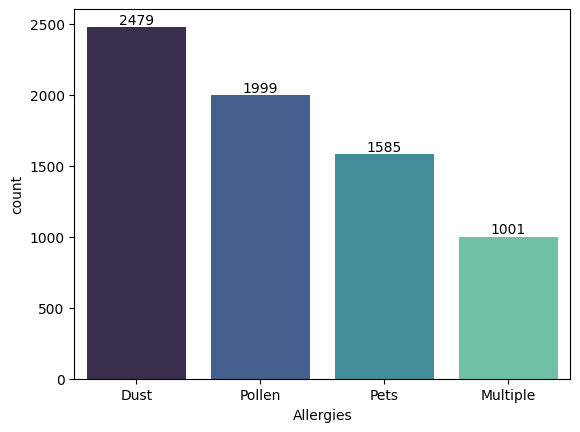

In [71]:
ax = sns.countplot(data=df, x='Allergies', palette='mako', order=df['Allergies'].value_counts(ascending=False).index)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

fill all nan values with 'no_allergy'

In [72]:
df['Allergies'] = df['Allergies'].fillna('No_Allergy')
df.head()

,Age,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
0,52,27.6,Former,1,No_Allergy,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0
1,15,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0
2,72,17.6,Never,0,No_Allergy,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0
3,61,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1
4,21,30.2,Never,0,No_Allergy,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0


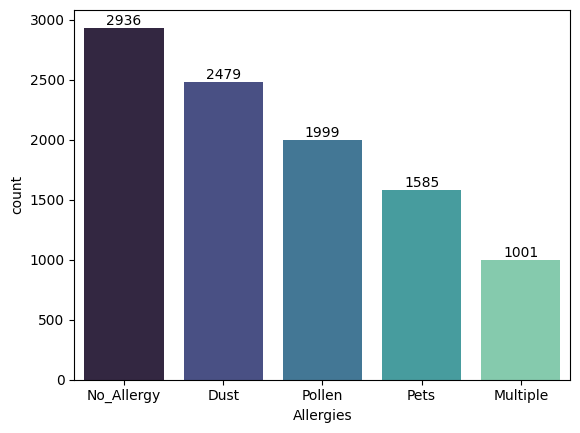

In [73]:
ax = sns.countplot(data=df, x='Allergies', palette='mako', order=df['Allergies'].value_counts(ascending=False).index)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

###  Observation:
<li> most of the people don't have any allergy 
<li> less people have multiple allergies

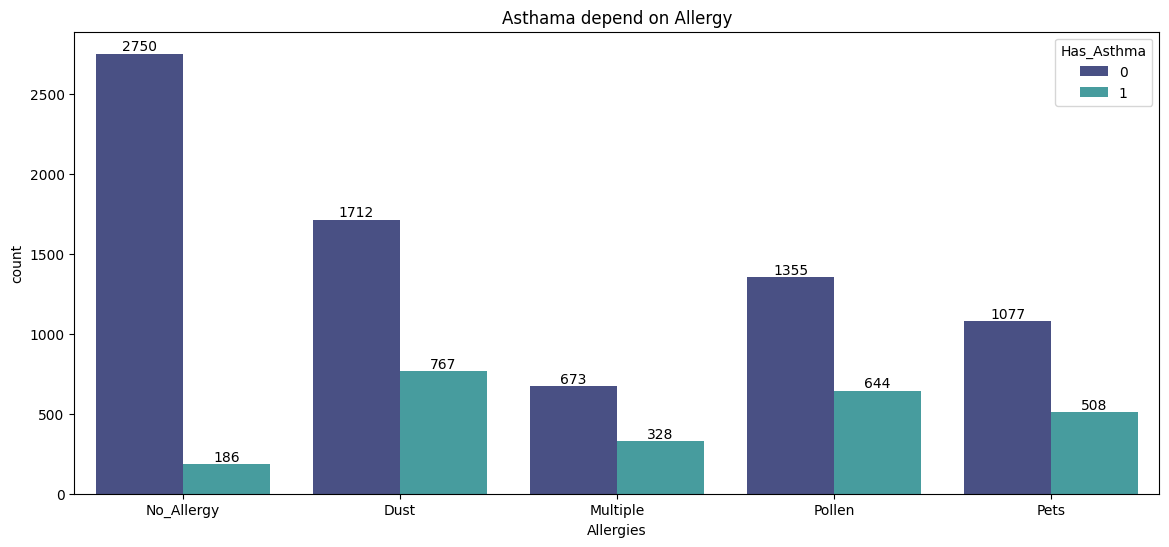

In [74]:
plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x='Allergies', hue='Has_Asthma' , palette='mako')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Asthama depend on Allergy')
plt.show()

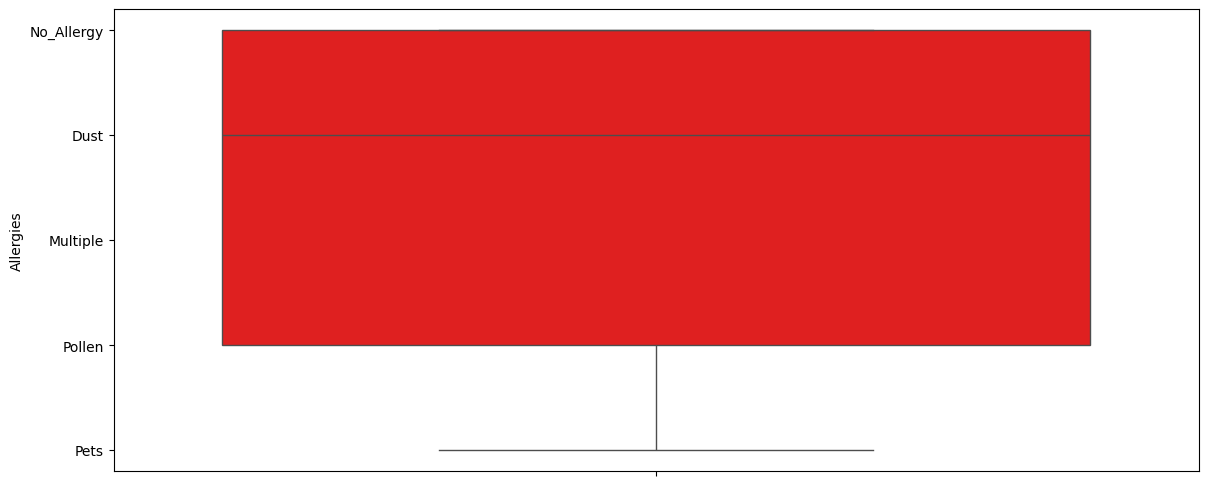

In [75]:
plt.figure(figsize=(14,6))
sns.boxplot(df['Allergies'], color='r')
plt.show()

# Analyzing the 'Comorbidities' feature

In [76]:
# Analyzing the 'Comorbidities' feature
df['Comorbidities'].unique()

array(['Diabetes', 'Both', nan, 'Hypertension'], dtype=object)

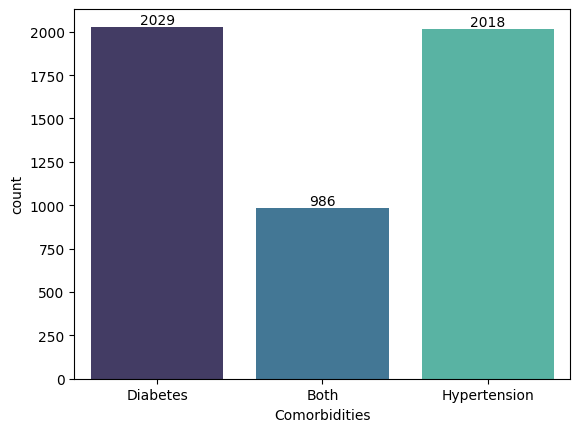

In [77]:
ax = sns.countplot(data=df, x='Comorbidities', palette='mako')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [78]:
df['Comorbidities'] = df['Comorbidities'].fillna('No_one')
df.head()

,Age,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
0,52,27.6,Former,1,No_Allergy,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0
1,15,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0
2,72,17.6,Never,0,No_Allergy,Moderate,Moderate,Indoor,No_one,0.38,0,303.3,15.3,0
3,61,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1
4,21,30.2,Never,0,No_Allergy,Moderate,Active,Indoor,No_one,0.82,3,535.0,27.7,0


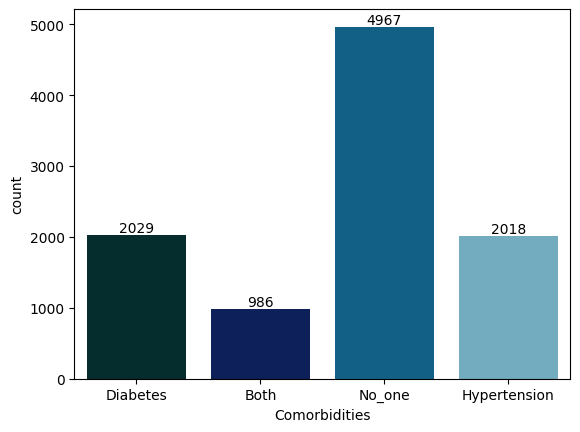

In [79]:
ax = sns.countplot(data=df, x='Comorbidities', palette='ocean')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### Observations:
<li> most of the people do not have any symptom
<li> people with both symptoms are less
<li> people with diabetes or people with Hypertension are almost equel.

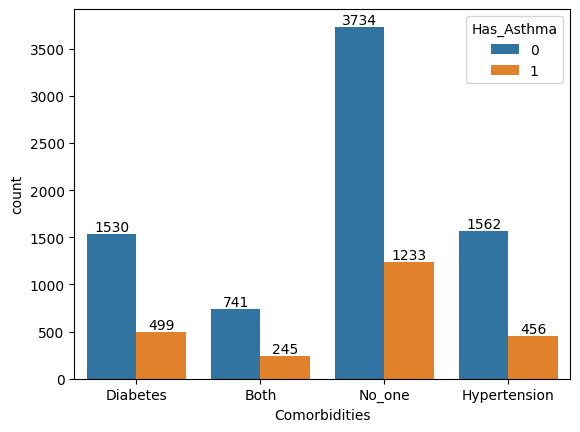

In [80]:
ax = sns.countplot(df, x='Comorbidities', hue='Has_Asthma')
for bars in ax.containers:
    ax.bar_label(bars)

### Obserbation:
<li> people with asthma or people without asthma, mostly neither have Diabetes nor have Hypertension.
<li> Number of people with asthma are lesser than number of people without asthma.

In [81]:
df.head()

,Age,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
0,52,27.6,Former,1,No_Allergy,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0
1,15,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0
2,72,17.6,Never,0,No_Allergy,Moderate,Moderate,Indoor,No_one,0.38,0,303.3,15.3,0
3,61,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1
4,21,30.2,Never,0,No_Allergy,Moderate,Active,Indoor,No_one,0.82,3,535.0,27.7,0


## Analysing the 'Smoking_Status' feature

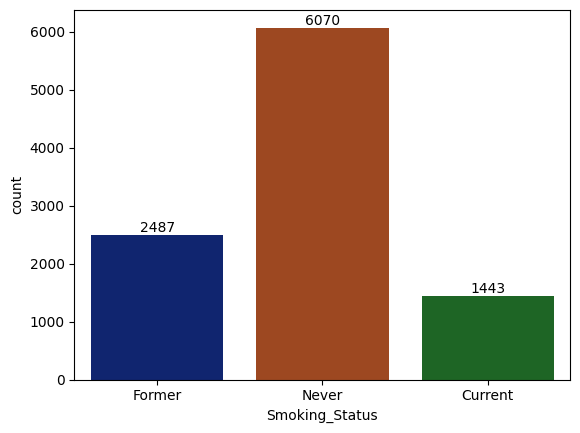

In [82]:
ax = sns.countplot(data=df, x='Smoking_Status', palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)

<li> Number of people are greater who didn't smoke
<li> There are 1443 people who are currently smoking

Text(0.5, 1.0, 'relate Smoking_Status with Has_Asthma feature')

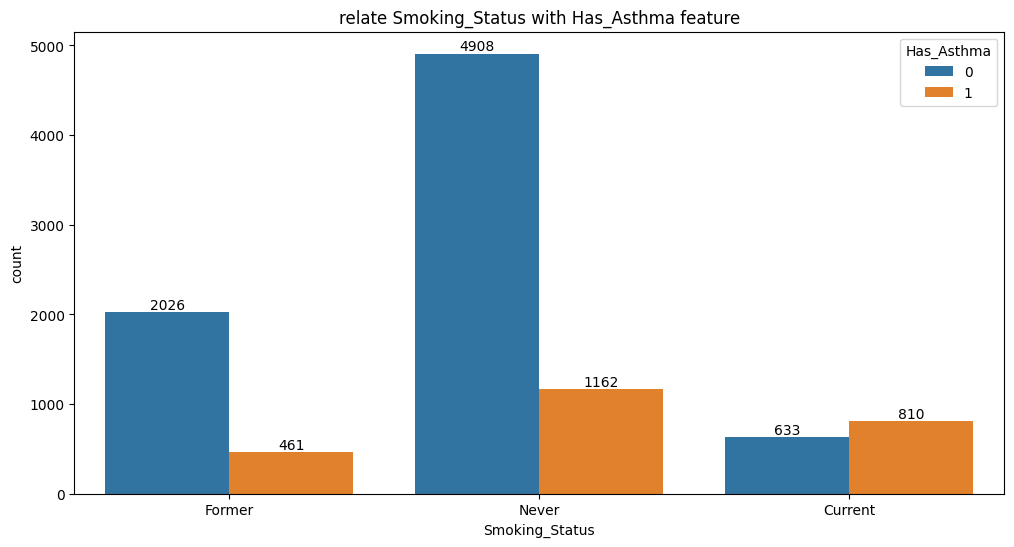

In [83]:
# analyzing Smoking_Status column with Has_Asthma
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='Smoking_Status', hue='Has_Asthma')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('relate Smoking_Status with Has_Asthma feature')

## Analyzing the 'Physical_Activity_Level' feature

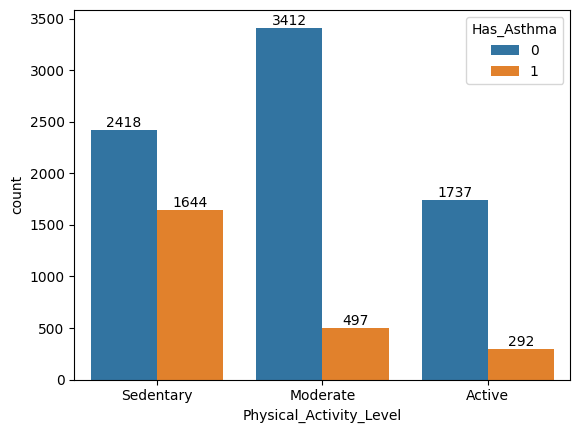

In [84]:
ax = sns.countplot(data=df, x='Physical_Activity_Level', hue='Has_Asthma')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [85]:
df['Comorbidities'].unique()

array(['Diabetes', 'Both', 'No_one', 'Hypertension'], dtype=object)

In [86]:
df['Smoking_Status'] = df['Smoking_Status'].replace({'Former':0, 'Never':1, 'Current':2})
df['Allergies'] = df['Allergies'].replace({'No_Allergy':0, 'Dust':1, 'Multiple':2, 'Pollen':3, 'Pets':4})
df['Air_Pollution_Level'] = df['Air_Pollution_Level'].replace({'Moderate':0, 'Low':1, 'High':2})
df['Physical_Activity_Level'] = df['Physical_Activity_Level'].replace({'Sedentary':0, 'Moderate':1, 'Active':2})
df['Occupation_Type'] = df['Occupation_Type'].replace({'Outdoor':0, 'Indoor':1})
df['Comorbidities'] = df['Comorbidities'].replace({'Diabetes':0, 'Both':1, 'No_one':2, 'Hypertension':3})

## Predicting Model

In [87]:
X = df[['Age', 'BMI', 'Smoking_Status', 'Family_History', 'Allergies','Air_Pollution_Level', 'Physical_Activity_Level', 'Occupation_Type','Comorbidities', 'Medication_Adherence', 'Number_of_ER_Visits','Peak_Expiratory_Flow', 'FeNO_Level']]
y = df[ 'Has_Asthma']

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
svc = ()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
accuracy_score(y_test, LR_pred)

0.87

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
accuracy_score(y_test, LR_pred)

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
accuracy_score(y_test, LR_pred)

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
accuracy_score(y_test, LR_pred)

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
accuracy_score(y_test, LR_pred)